Generar imagen, a partir de un modelo DEM

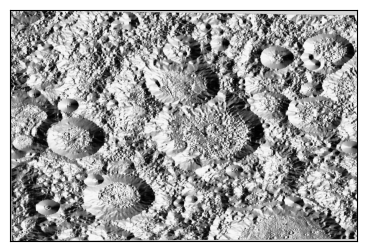

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio
from matplotlib.animation import FuncAnimation

# Get the data Folder with images

fold_img = r"D:\Tesis maestria\Luna\GIS\DEM"  # Agrega 'r' al principio para tratar la cadena como una cadena cruda


dem_moon = os.path.join(fold_img, "Garavito_zone_LOLA.tif")


# Open the DEM with Rasterio


with rio.open(dem_moon) as src:
    elevation = src.read(1)
    # Set masked values to np.nan
    #elevation[elevation < 2000] = np.nan

hillshade_moon = es.hillshade(elevation, azimuth=90, altitude=30)

 # Plot the hillshade layer with the modified angle altitude
ep.plot_bands(
    hillshade_moon,
    cbar=False,
    # title="Hillshade with azimuth and altitude}",
    figsize=(5, 3),
)

plt.show()

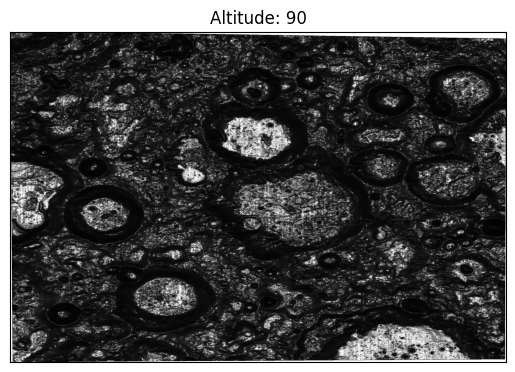

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio
from matplotlib.animation import FuncAnimation

# Get the data Folder with images
fold_img = r"D:\Tesis maestria\Luna\GIS\DEM"  # Agrega 'r' al principio para tratar la cadena como una cadena cruda
dem_moon = os.path.join(fold_img, "Garavito_zone_LOLA.tif")

# Open the DEM with Rasterio
with rio.open(dem_moon) as src:
    elevation = src.read(1)

# Configuración de azimut y altitud
azimuth = [90]
altitude = np.arange(90, -1, -5)  # Decreciendo de 90 a 0

# Configuración de la figura y el eje
fig, ax = plt.subplots()


def update(i):
    ax.clear()
    # Adjust the azimuth value
    hillshade_moon = es.hillshade(elevation, azimuth=azimuth[0], altitude=altitude[i])
    # Plot the hillshade layer with the modified angle altitude
    ep.plot_bands(
        hillshade_moon,
        cbar=False,
        # title="Hillshade with azimuth and altitude",
        figsize=(5, 3),
        ax=ax,
    )
    ax.set_title(f"Altitude: {altitude[i]}")


# Generar animación
ani = FuncAnimation(fig, update, frames=len(altitude), interval=500)

# Guardar animación como video
ani.save("hillshade_animation.mp4", writer="ffmpeg")

plt.show()